# **Pipeline and Productionisation of Machine Learning Models (Model Serialization)**

### **Loading the Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv('data/iris.csv')

In [3]:
print(iris.shape)

(150, 6)


In [4]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

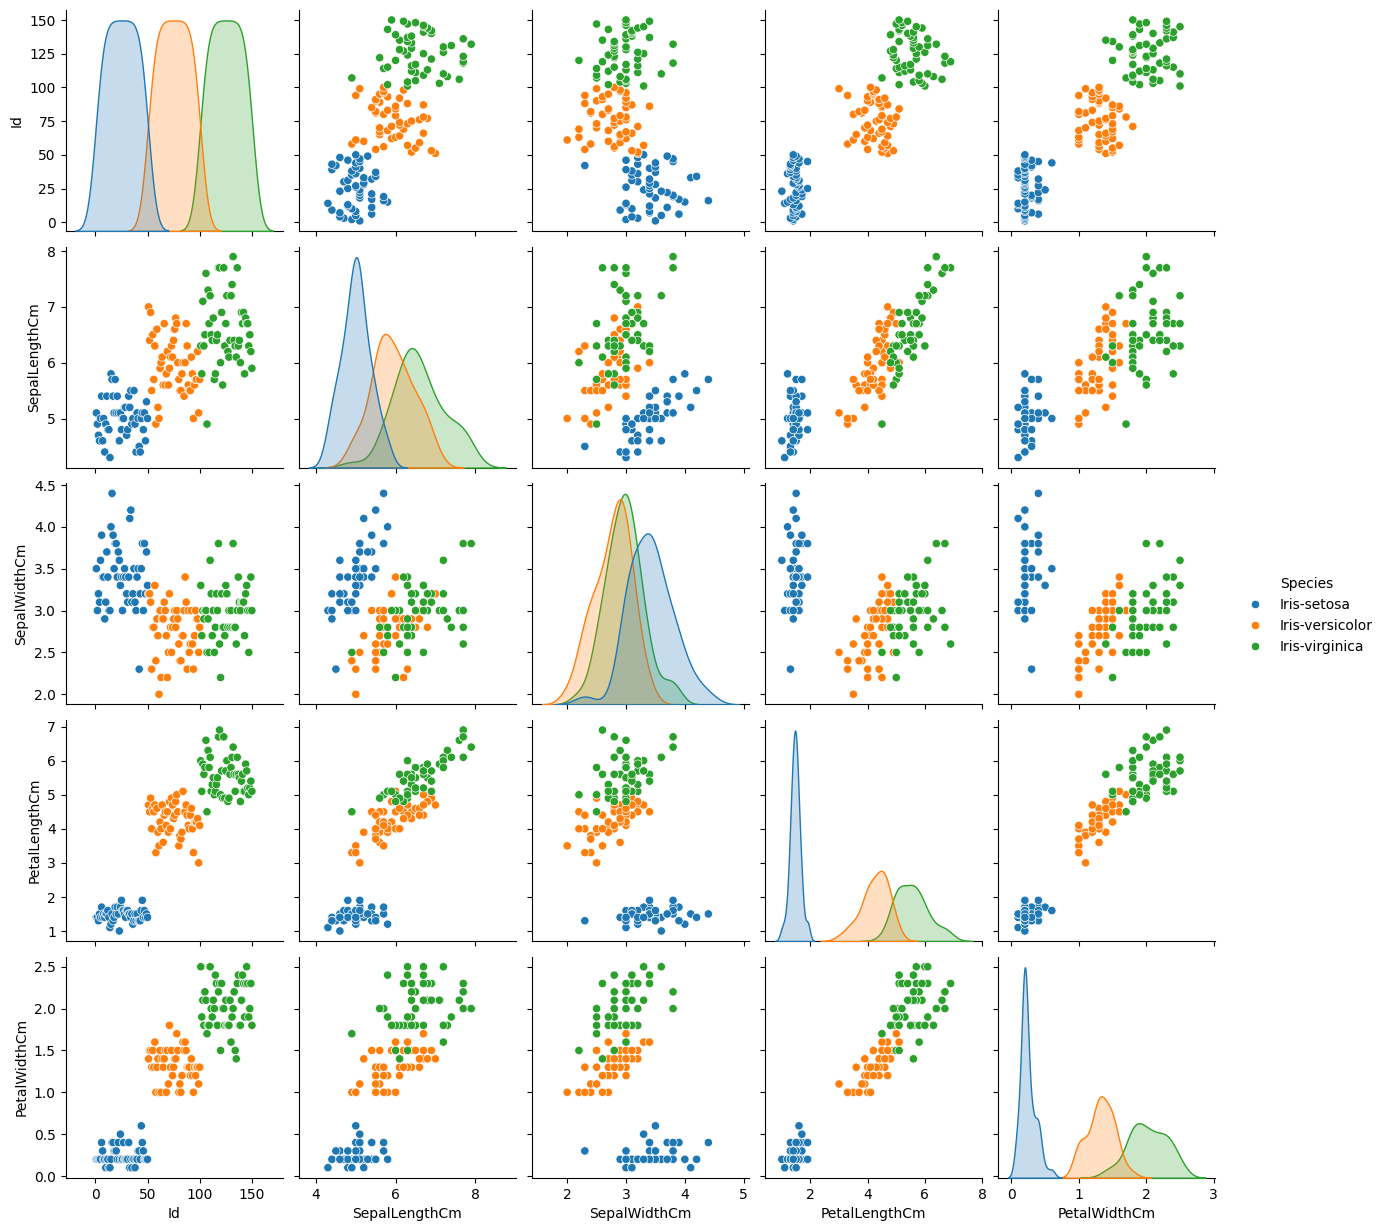

In [5]:
sns.pairplot(iris, hue = 'Species')

In [6]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### **Step 1 - Identify Input and Output**

In [7]:
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

y = iris['Species']

### **Step 2 - Split the Data into Train and Test**

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(X_train.shape, X_test.shape)

(112, 4) (38, 4)


### **Step 3 - Data Preprocessing on train data (X_train)**

In [9]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_rescaled = scaler.fit_transform(X_train)

print(type(X_train_rescaled))

<class 'numpy.ndarray'>


In [10]:
X_train_rescaled = pd.DataFrame(X_train_rescaled, 
                                columns = scaler.get_feature_names_out(), 
                                index = X_train.index)

X_train_rescaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
61,0.015440,-0.119255,0.225127,0.356382
92,-0.099845,-1.040395,0.113560,-0.028648
112,1.053005,-0.119255,0.950314,1.126441
2,-1.367980,0.341315,-1.392599,-1.312081
141,1.168290,0.111030,0.727180,1.383128


In [11]:
print("Features:", scaler.get_feature_names_out())

Features: ['SepalLengthCm' 'SepalWidthCm' 'PetalLengthCm' 'PetalWidthCm']


In [12]:
print("Standard Deviation:", scaler.scale_)
print("Mean:", scaler.mean_)
print("Sample Size:", scaler.n_samples_seen_)

Standard Deviation: [0.86741565 0.43424445 1.79264014 0.77916047]
Mean: [5.88660714 3.05178571 3.79642857 1.22232143]
Sample Size: 112


In [13]:
X_train.mean()

SepalLengthCm    5.886607
SepalWidthCm     3.051786
PetalLengthCm    3.796429
PetalWidthCm     1.222321
dtype: float64

In [14]:
X_train.std()

# By default, ddof=1 
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html

SepalLengthCm    0.871314
SepalWidthCm     0.436196
PetalLengthCm    1.800697
PetalWidthCm     0.782662
dtype: float64

**Why is there a difference? 😥**

Documentation says:  
We use a biased estimator for the standard deviation, equivalent to `numpy.std(x, ddof=0)`. Note that the choice of ddof is unlikely to affect model performance.

In [15]:
X_train.std(ddof=0)

# Worked? 😱

SepalLengthCm    0.867416
SepalWidthCm     0.434244
PetalLengthCm    1.792640
PetalWidthCm     0.779160
dtype: float64

### **Step 4 - Data Preprocessing on Test Data (X_test)**

In [16]:
X_test_rescaled = pd.DataFrame(scaler.transform(X_test), 
                                   columns = scaler.get_feature_names_out(), 
                                   index = X_test.index)

X_test_rescaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
114,-0.099845,-0.579825,0.727180,1.511471
62,0.130725,-1.961535,0.113560,-0.285335
33,-0.445700,2.644166,-1.336815,-1.312081
107,1.629430,-0.349540,1.396583,0.741412
7,-1.022125,0.801885,-1.281032,-1.312081


### **Step 5 - Building a Model (i.e. Train the classifier)**

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()

knn_classifier.fit(X_train_rescaled, y_train)

KNeighborsClassifier()

### **Step 6 - Evaluating on Train Data**

In [18]:
from sklearn import metrics

# make class predictions for X_train_dtm
y_train_pred = knn_classifier.predict(X_train_rescaled)

metrics.accuracy_score(y_train, y_train_pred)

0.9642857142857143

### **Step 7 - Evaluate on Test Data**

In [19]:
y_test_pred = knn_classifier.predict(X_test_rescaled)

metrics.accuracy_score(y_test, y_test_pred)

0.9736842105263158

### **Is this the BEST MODEL?**

Upon initial assessment, it appears that the model exhibits the following characteristics:
1. High train_score, indicating that the algorithm effectively learned from the training data.
2. High test_score, suggesting that the model generalizes well when applied to unseen testing data.

It is imperative to conduct a thorough evaluation of model performance to determine the optimal solution. While the initial assessment reveals promising characteristics such as high train and test scores, it is essential to delve deeper into additional factors to ascertain the best model for the task at hand.

**Key Considerations:**

1. **Model Size**: Assessing the complexity and resource requirements of the model is crucial. A larger model size may indicate increased computational overhead and storage requirements.

2. **Training Time**: Evaluating the time taken to train the model provides insights into computational efficiency and resource utilization during the training phase. Minimizing training time is essential for scalable and efficient model development.

3. **Prediction Time**: Examining the speed and efficiency of model predictions in real-world scenarios is paramount. Models with faster prediction times are more suitable for deployment in production environments.

By meticulously considering these additional criteria alongside traditional performance metrics, we can make a more informed decision regarding the suitability and effectiveness of the model.

**Identified Problems:**

In addition to evaluating model performance, it is essential to address underlying issues in the current approach:

1. **Efficiency**: The current code may lack efficiency, potentially leading to suboptimal performance and resource utilization.

2. **Reproducibility**: Ensuring reproducibility is essential for maintaining consistency and reliability across different environments and datasets.

3. **Scalability**: Scalability is paramount for accommodating larger datasets and increasing computational demands as the project evolves.

**Answering Key Questions:**

1. **Algorithm Flexibility**: The number of algorithms that can be applied is crucial for exploring various modeling approaches and selecting the most suitable one.

2. **Model Variability**: Each algorithm's ability to generate more than one model enables comprehensive exploration of hyperparameters and configurations, facilitating model optimization.

3. **Data Preprocessing Techniques**: The capability to apply diverse data preprocessing techniques enhances the model's adaptability and robustness to different types of data.

**Exploring Permutations and Combinations:**

Considering all possible combinations of algorithms, model variations, and data preprocessing techniques allows for a comprehensive exploration of the solution space. This exhaustive analysis is essential for identifying the most effective model configuration that meets project requirements and objectives.

## **Introducing Pipelines for Optimal Workflow**

Pipelines help improve the efficiency, reproducibility, and scalability of the machine learning workflow by automating and standardizing common tasks and processes. They also promote cleaner and more modular code, making it easier to maintain and extend machine learning models over time.

**How does Pipeline work?**  
Pipeline allows you to sequentially apply a list of transformers to preprocess the data and, if desired, conclude the sequence with a final predictor for predictive modeling.

Intermediate steps of the pipeline must be ‘transformers’, that is, they must implement fit and transform methods. The final estimator only needs to implement fit. The transformers in the pipeline can be cached using memory argument.

Pipelines are important because 
1. **Efficient Hyperparameter Tuning:** Using pipelines also allows for hyperparameter tuning and cross-validation to be performed more efficiently, as the entire pipeline can be treated as a single estimator. This makes it easier to search over a space of hyperparameters and evaluate different configurations. Overall, pipelines promote code modularity, reusability, and reproducibility in machine learning projects.
2. **Automate ML Workflows:** They help automate machine learning workflows by sequentially applying a series of preprocessing steps followed by a model fitting step. This ensures that all preprocessing steps are applied consistently to both the training and testing data, avoiding data leakage and making the code more readable and maintainable.

In [19]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

In [20]:
# Define pipeline steps
pipe_1 = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier())
    ]
)

N_NEIGHBORS = [i for i in range(3, 21, 2)]
P = [1, 2, 3]

# Observe the Key Value Pair format
parameter_grid_1 = [
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'classifier__n_neighbors' : N_NEIGHBORS,              
        'classifier__p' : P
    }
]

clf = GridSearchCV(
    estimator=pipe_1, 
    param_grid=parameter_grid_1, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
CPU times: total: 5.66 s
Wall time: 5.72 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid=[{'classifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15,
                                                      17, 19],
                          'classifier__p': [1, 2, 3],
                          'scaler': [StandardScaler(), MinMaxScaler()]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [21]:
print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Best estimator found on train set
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

Score on Test Data:  0.9736842105263158


## **Serialization and Deserialization**

Serialization is the process of converting a Python object into a byte stream, which can then be stored in a file or transmitted over a network. Deserialization is the reverse process, where the byte stream is converted back into a Python object.

In the context of the `joblib` library in Python:

- **Serialization**: In `joblib`, serialization refers to the process of converting a Python object into a byte stream using the `joblib.dump()` function. This byte stream can then be written to a file or transmitted over a network.

- **Deserialization**: Deserialization in `joblib` involves reading a byte stream from a file or network and converting it back into a Python object using the `joblib.load()` function.

In [22]:
import joblib
import os

In [23]:
# Serialization

best_model = clf.best_estimator_

joblib.dump(best_model, 'best_models/demo_model_knn.pkl')

['best_models/demo_model_knn.pkl']

In [24]:
# Deserialization

model = joblib.load('best_models/demo_model_knn.pkl')

new_data = np.array([[5.1, 3.0, 1.1, 0.1]])

prediction = model.predict(new_data)

print("Prediction:", prediction)

Prediction: ['Iris-setosa']


C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [25]:
# Let's analyse the models prediction time and model size

%time y_test_pred = model.predict(X_test)

print("Accuracy Score:", metrics.accuracy_score(y_test, y_test_pred))

CPU times: total: 0 ns
Wall time: 7.2 ms
Accuracy Score: 0.9736842105263158


In [26]:
print("Model Size:", os.path.getsize('best_models/demo_model_knn.pkl'), "Bytes")

Model Size: 11965 Bytes


## **Finding the best SVM model using Effective Pipelining and Productionization of the Model**

In [27]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

In [28]:
pipe_2 = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('classifier', SVC())
    ]
)

DEGREE = [2, 3, 4, 5]
C = [0.1, 0.01, 1, 10, 100]


# Observe the Key Value Pair format
parameter_grid_2 = [
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'classifier__kernel' : ['rbf'], 
        'classifier__C' : C
    }, 
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'classifier__kernel' : ['poly'], 
        'classifier__degree' : DEGREE, 
        'classifier__C' : C
    }, 
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'classifier__kernel' : ['linear'], 
        'classifier__C' : C
    }
]

clf = GridSearchCV(
    estimator=pipe_2, 
    param_grid=parameter_grid_2, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
CPU times: total: 3.39 s
Wall time: 3.37 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid=[{'classifier__C': [0.1, 0.01, 1, 10, 100],
                          'classifier__kernel': ['rbf'],
                          'scaler': [StandardScaler(), MinMaxScaler()]},
                         {'classifier__C': [0.1, 0.01, 1, 10, 100],
                          'classifier__degree': [2, 3, 4, 5],
                          'classifier__kernel': ['poly'],
                          'scaler': [StandardScaler(), MinMaxScaler()]},
                         {'classifier__C': [0.1, 0.01, 1, 10, 100],
                          'classifier__kernel': ['linear'],
                          'scaler': [StandardScaler(), MinMaxScaler()]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [29]:
print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Best estimator found on train set
Pipeline(steps=[('scaler', MinMaxScaler()), ('classifier', SVC(C=1))])

Score on Test Data:  0.9736842105263158


In [30]:
# Serialization

best_model = clf.best_estimator_

joblib.dump(best_model, 'best_models/demo_model_svc.pkl')

['best_models/demo_model_svc.pkl']

In [31]:
# Deserialization

model = joblib.load('best_models/demo_model_svc.pkl')

new_data = np.array([[5.1, 3.0, 1.1, 0.1]])

prediction = model.predict(new_data)

print("Prediction:", prediction)

Prediction: ['Iris-setosa']


C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [32]:
# Let's analyse the models prediction time and model size

%time y_test_pred = model.predict(X_test)

print("Accuracy Score", metrics.accuracy_score(y_test, y_test_pred))

CPU times: total: 0 ns
Wall time: 2.6 ms
Accuracy Score 0.9736842105263158


In [33]:
print("Model Size:", os.path.getsize('best_models/demo_model_svc.pkl'), "Bytes")

Model Size: 5634 Bytes


## **Writting Even More Complicated Pipelines to Automate the Workflow**

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [35]:
pipelines = {
    'knn' : Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier())
    ]), 
    'svc' : Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', SVC())
    ]),
    'logistic_regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ]),
    'random_forest': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier())
    ]),
    'decision_tree': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', DecisionTreeClassifier())
    ]),
    'naive_bayes': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', GaussianNB())
    ])
}

# Define parameter grid for each algorithm
param_grids = {
    'knn': [
        {
            'scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__n_neighbors' : [i for i in range(3, 21, 2)], 
            'classifier__p' : [1, 2, 3]
        }
    ],
    'svc': [
        {
            'scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__kernel' : ['rbf'], 
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        }, 
        {
            'scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__kernel' : ['poly'], 
            'classifier__degree' : [2, 3, 4, 5], 
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        }, 
        {
            'scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__kernel' : ['linear'], 
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        }
    ],
    'logistic_regression': [
        {
            'scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['l2']
        }, 
        {
            'scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['l1'], 
            'classifier__solver': ['liblinear']
        }, 
        {
            'scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga']
        }
    ],
    'random_forest': [
        {
            'scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__n_estimators': [50, 100, 200]
        }
    ],
    'decision_tree': [
        {
            'scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'naive_bayes': [
        {
            'scaler': [StandardScaler(), MinMaxScaler()]
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1
                              )
    
    %time grid_search.fit(X_train, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    
    print('Score on Test Data: ', grid_search.score(X_test, y_test))

********** knn **********
Fitting 5 folds for each of 54 candidates, totalling 270 fits
CPU times: total: 5.84 s
Wall time: 5.93 s
Score on Test Data:  0.9736842105263158
********** svc **********
Fitting 5 folds for each of 60 candidates, totalling 300 fits
CPU times: total: 3.48 s
Wall time: 3.56 s
Score on Test Data:  0.9736842105263158
********** logistic_regression **********
Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

CPU times: total: 2.06 s
Wall time: 2.14 s
Score on Test Data:  0.9736842105263158
********** random_forest **********
Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 6.64 s
Wall time: 6.71 s
Score on Test Data:  0.9736842105263158
********** decision_tree **********
Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 297 ms
Wall time: 300 ms
Score on Test Data:  0.9736842105263158
********** naive_bayes **********
Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 125 ms
Wall time: 129 ms
Score on Test Data:  1.0


In [36]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

knn
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

svc
Pipeline(steps=[('scaler', MinMaxScaler()), ('classifier', SVC(C=1))])

logistic_regression
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=10, l1_ratio=0.4, penalty='elasticnet',
                                    solver='saga'))])

random_forest
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(n_estimators=50))])

decision_tree
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', DecisionTreeClassifier())])

naive_bayes
Pipeline(steps=[('scaler', StandardScaler()), ('classifier', GaussianNB())])



In [37]:
import joblib
import os

for name, model in best_models.items():
    print("*"*10, name, "*"*10)
    
    joblib.dump(model, f'best_models/{name}.pkl')
    model = joblib.load(f'best_models/{name}.pkl')
    
    # new_data = np.array([[5.1, 3.0, 1.1, 0.1]])
    %time y_test_pred = model.predict(X_test)
    print("Accuracy Score", metrics.accuracy_score(y_test, y_test_pred))
    
    print("Model Size:", os.path.getsize(f'best_models/{name}.pkl'), "Bytes")

********** knn **********
CPU times: total: 15.6 ms
Wall time: 3.98 ms
Accuracy Score 0.9736842105263158
Model Size: 11965 Bytes
********** svc **********
CPU times: total: 0 ns
Wall time: 1.99 ms
Accuracy Score 0.9736842105263158
Model Size: 5634 Bytes
********** logistic_regression **********
CPU times: total: 0 ns
Wall time: 997 µs
Accuracy Score 0.9736842105263158
Model Size: 2142 Bytes
********** random_forest **********
CPU times: total: 0 ns
Wall time: 3.99 ms
Accuracy Score 0.9736842105263158
Model Size: 83975 Bytes
********** decision_tree **********
CPU times: total: 0 ns
Wall time: 1.99 ms
Accuracy Score 0.9736842105263158
Model Size: 3720 Bytes
********** naive_bayes **********
CPU times: total: 15.6 ms
Wall time: 998 µs
Accuracy Score 1.0
Model Size: 2070 Bytes
